# Excluding DL training data

In [1]:
import os
from skimage.io import imread, imsave
import numpy as np
from pyclesperanto_prototype import imshow

In [11]:
label_folder = "../crystal data/3. excluded small labels/"
classifier_result_folder = "../crystal data/5. classification labels/5. size + shape/"

In [12]:
file_list = sorted(os.listdir(label_folder))
file_list

['img01_20220429_ET358_56hpf_1.tif',
 'img02_20220429_ET358_56hpf_2.tif',
 'img03_20220429_ET358_56hpf_3.tif',
 'img05_20220513_ET358_56hpf_1.tif',
 'img06_20220513_ET358_56hpf_2.tif',
 'img08_20220513_ET358_56hpf_4.tif',
 'img10_20220513_ET358_56hpf_6.tif',
 'img12_20220513_ET358_56hpf_8.tif',
 'img13_20220513_ET358_56hpf_9.tif',
 'img14_20220520_hsp-mKate-DN-dynactin_56hpf_1.tif',
 'img15_20220520_hsp-mKate-DN-dynactin_56hpf_2.tif',
 'img17_20220520_hsp-mKate-DN-dynactin_56hpf_4.tif',
 'img18_20220520_hsp-mKate-DN-dynactin_56hpf_5.tif']

In [13]:
label_list = []
classification_result_list = []

for i, filename in enumerate(file_list):
    label = imread(label_folder + filename)
    classification = imread(classifier_result_folder + filename)
    label_list.append(label)
    classification_result_list.append(classification)

img01_20220429_ET358_56hpf_1.tif


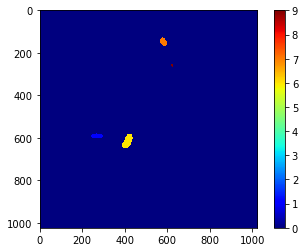

img02_20220429_ET358_56hpf_2.tif


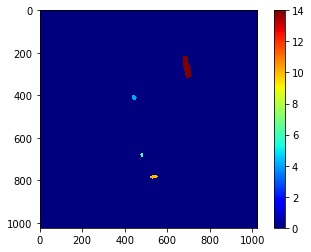

img03_20220429_ET358_56hpf_3.tif


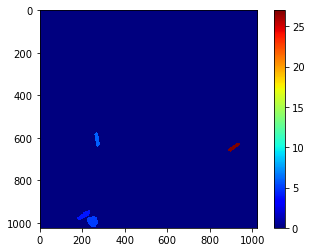

img05_20220513_ET358_56hpf_1.tif


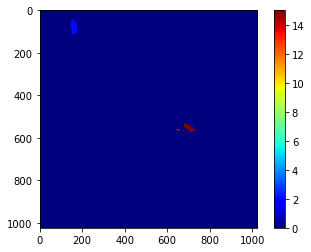

img06_20220513_ET358_56hpf_2.tif


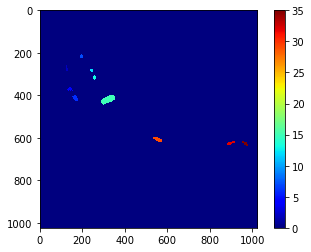

img08_20220513_ET358_56hpf_4.tif


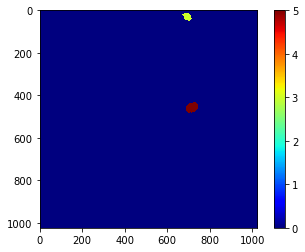

img10_20220513_ET358_56hpf_6.tif


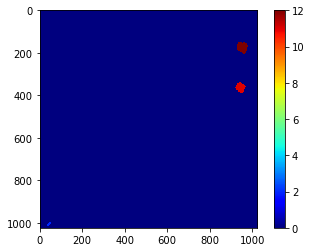

img12_20220513_ET358_56hpf_8.tif


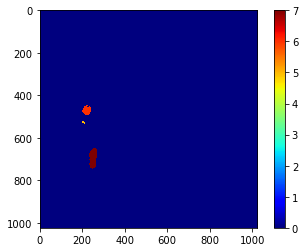

img13_20220513_ET358_56hpf_9.tif


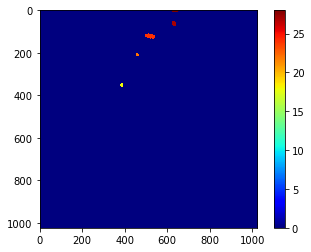

img14_20220520_hsp-mKate-DN-dynactin_56hpf_1.tif


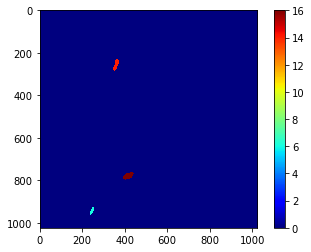

img15_20220520_hsp-mKate-DN-dynactin_56hpf_2.tif


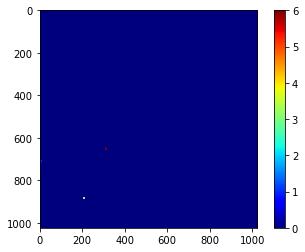

img17_20220520_hsp-mKate-DN-dynactin_56hpf_4.tif


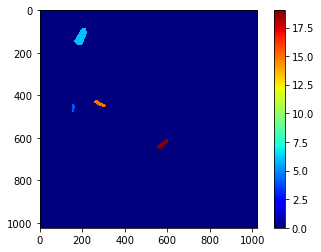

img18_20220520_hsp-mKate-DN-dynactin_56hpf_5.tif


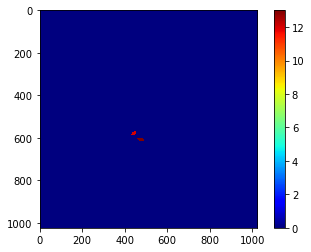

In [14]:
for class_image,label,filename in zip(classification_result_list,label_list,file_list):
    #change class of bad crystals (1) to background (0)
    class_image = np.asarray(class_image)
    class_image[class_image == 1]=0
    class_image_mask = class_image.astype(bool)
    
    #exclude bad labels from label image
    label_image_filtered=np.copy(label)
    label_image_filtered[class_image_mask==False]=0
    print(filename)
    
    #show good labels 
    imshow(label_image_filtered, colorbar= True,colormap='jet',min_display_intensity=0)